# Exploratory data analysis (EDA) of supermarkets data

## Libraries and settings

In [31]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

c:\Users\Jasmin\Desktop\DA\data_analytics\Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [32]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['id', 'lat', 
                                                         'lon', 'brand', 'shop', 'addr:city',
                                                          'addr:housenumber', 'addr:postcode', 'geometry', 
                                                          'index_right', 'bfs_name', 'bfs_number', 'pop', 
                                                          'pop_dens', 'frg_pct', 'emp']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


### Data types

In [33]:
df_orig.dtypes

id                    int64
lat                 float64
lon                 float64
brand                object
shop                 object
addr:city            object
addr:housenumber     object
addr:postcode       float64
geometry             object
index_right           int64
bfs_name             object
bfs_number            int64
pop                   int64
pop_dens            float64
frg_pct             float64
emp                 float64
dtype: object

### Summary statistics of numeric variables

In [34]:
df_orig.describe()

,id,lat,lon,addr:postcode,index_right,bfs_number,pop,pop_dens,frg_pct,emp
count,9.170000e+02,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,3.311310e+09,47.161604,8.210356,6076.061069,660.029444,2150.366412,68127.414395,1792.525333,25.816458,72992.950927
std,2.787019e+09,0.361890,0.722385,2443.964131,548.951796,1953.348564,125606.835489,2044.191311,9.158875,148130.598183
min,3.672616e+07,45.834489,6.075670,1003.000000,0.000000,2.000000,291.000000,4.246455,4.116866,109.000000
25%,7.645283e+08,47.003549,7.613881,4058.000000,210.000000,293.000000,5350.000000,376.593575,19.484350,2635.000000
50%,2.490794e+09,47.241245,8.397358,6300.000000,486.000000,1402.000000,12861.000000,995.411529,25.432192,7044.000000
75%,5.243199e+09,47.409211,8.650783,8274.000000,1016.000000,3544.000000,37082.000000,2607.342115,32.458468,34703.000000
max,9.974890e+09,47.748807,10.295286,9642.000000,2249.000000,6775.000000,420217.000000,12810.992462,54.808906,491193.000000


In [35]:
# Count the number of supermarkets per brand
brand_counts = df_orig['brand'].value_counts()

# Display the results
print(brand_counts)



brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64


### Extreme values

In [36]:
# most counts
max = df_orig['brand'].value_counts().idxmax()

# least counts
min = df_orig['brand'].value_counts().idxmin()

# Display the results
print("The brand with the most supermarkets is: " + max)
print("The brand with the least supermarkets is: " + min)


The brand with the most supermarkets is: Migros
The brand with the least supermarkets is: ZWIBOL


## Univariate graphical exploratory data analysis (EDA)

### Barchart  (matplotlib)

In [37]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df_orig['brand'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

['ZWIBOL',
 'Globus',
 'VOI',
 'Migros-Outlet',
 'Alnatura',
 'Landi',
 'Spar',
 'Lidl',
 'Aldi',
 'ALDI',
 'VOI Migros Partner',
 'Volg',
 'Denner',
 'Coop',
 'Migros']

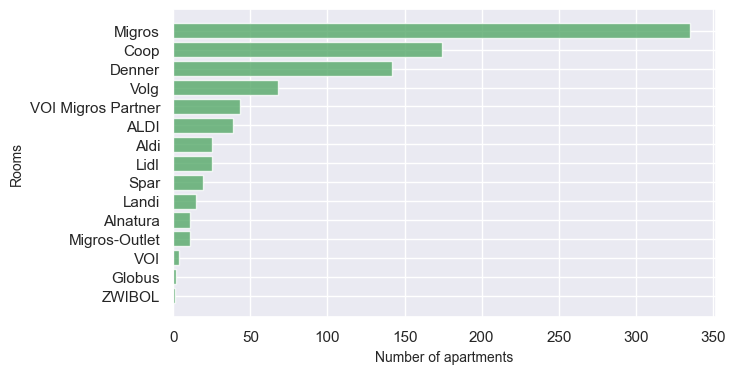

In [38]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df_orig['brand'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot-matrix (seaborn)

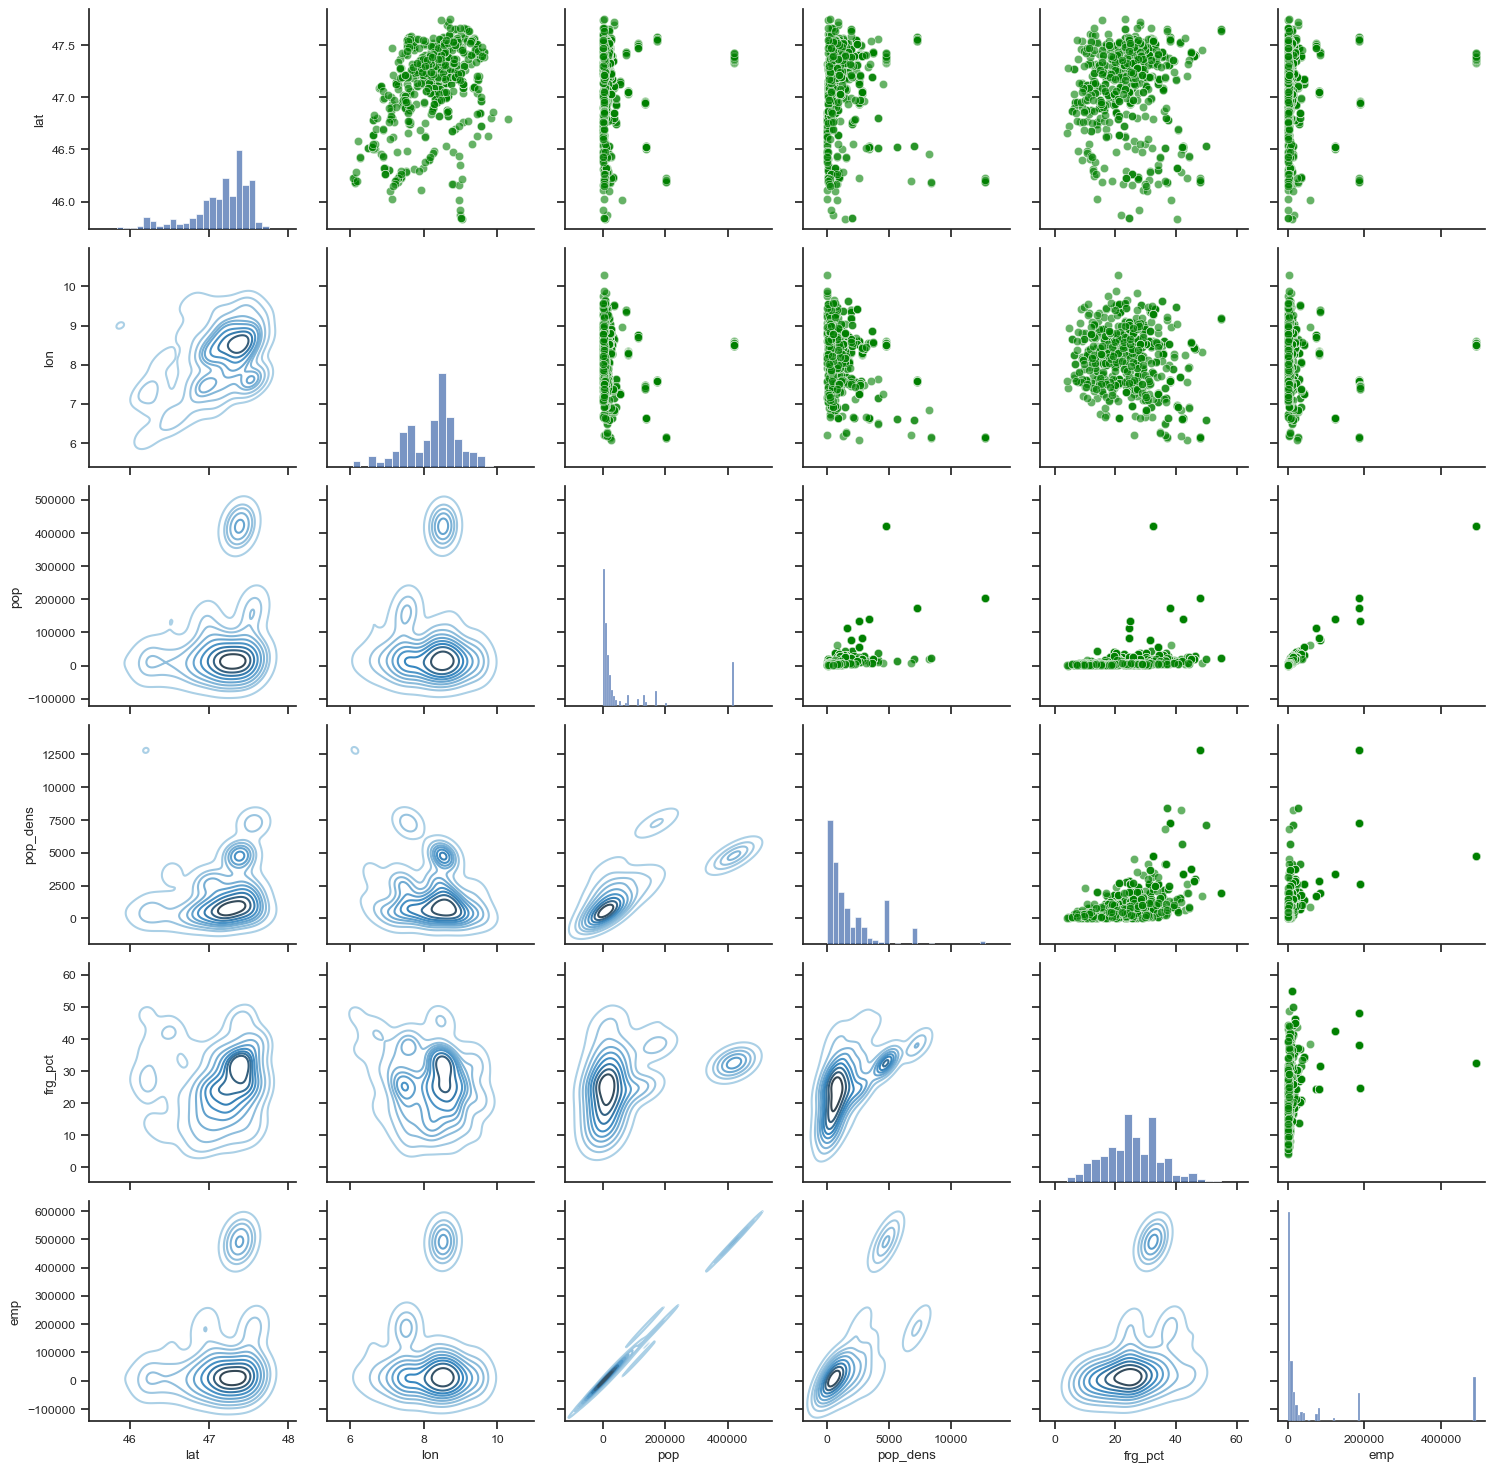

In [53]:
# Create a DataFrame with the specified numeric variables
numeric_vars = df_orig[['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']]

# Create a PairGrid
g = sns.PairGrid(numeric_vars)
g = g.map_upper(sns.scatterplot, color="green", alpha=0.6)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.histplot, kde_kws={'color': 'orange'})

# Display the PairGrid
plt.show()


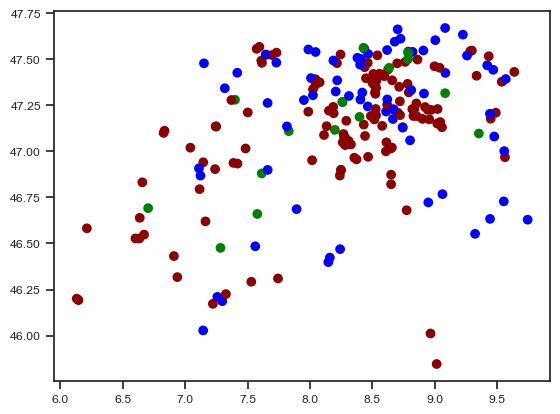

In [64]:
# Create a DataFrame with the specified numeric variables
df = df_orig[['id', 'brand', 'lat', 'lon']]

#subset data
df_sub = df.loc[df['brand'].isin(['Denner', 'Volg', 'Landi'])]
df_sub

#colors
colors = {'Denner':'darkred', 'Volg':'blue', 'Landi':'green'}

#plot
plt.scatter(df_sub['lon'], 
            df_sub['lat'], 
            c=df_sub['brand'].map(colors))

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [137]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-10-27 19:42:48
Python Version: 3.12.0
-----------------------------------
